## Introduction to Convolutional

Convolutional networks, which are widely used in the field of computer vision. The modules used in common volume network can be implemented very easily using pytorch. Let's talk about the volumes in pytorch.

### Convolutional 

There are two ways to convolve in pytorch. One is ```torch.nn.Conv2d()``` that one of ```torch.nn.functional.conv2d()``` the two forms essentially uses a convolution operation.

Both forms of the convolution for the input requirements are the same, is a first need to enter torch.autograd.Variable()the type, size (batch, channel, H, W ), where the number represents the number of batch input data, the second Is the number of channels input, generally a color picture is 3, grayscale is 1, and the number of channels in the convolution network process is relatively large, there will be tens to hundreds of channels, H and W represent input pictures The height and width, such as a batch is 32 pictures, each picture is 3 channels, the height and width are 50 and 100 respectively, then the input size is (32, 3, 50, 100)

The following examples illustrate these two convolution methods.

In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im = Image.open('./cat.png').convert('L') # Read a picture of Gray Scale Image
im = np.array(im, dtype='float32') # Convert it to a matrix

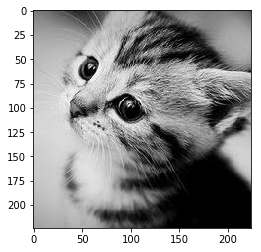

In [3]:
# Visualize the image
plt.imshow(im.astype('uint8'), cmap='gray')

In [4]:
# Convert image matrix to python Tensor and adapt to the requirement of Convolutional Input
im = torch.from_numpy(im.reshape((1, 1, im.shape[0], im.shape[1]))) 

Below we define an operator to perform contour detection

In [10]:
# nn.Conv2D

Conv1 = nn.Conv2d(1,1,3,bias=False)

Sobel_kernel = np.array([[-1,-1,-1],[-1,8,1],[-1,-1,-1]],dtype = 'float32') 
Sobel_kernel = Sobel_kernel.reshape((1,1,3,3)) #Adaptation Convolutional Input and output

Conv1.weight.data = torch.from_numpy(Sobel_kernel)

Edge1 = Conv1(Variable(im)) # on the image
Edge1 = Edge1.data.squeeze().numpy() #Convert output to the format of the image

visualize the result after edge detection

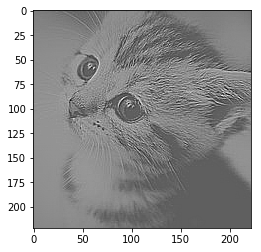

In [12]:
plt.imshow(Edge1, cmap='gray')

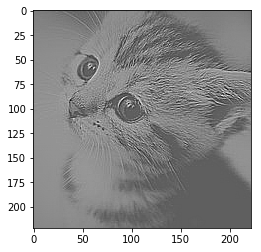

In [18]:
# Using F.conv2D

# nn.Conv2D

Sobel_kernel = np.array([[-1,-1,-1],[-1,8,1],[-1,-1,-1]],dtype = 'float32') 
Sobel_kernel = Sobel_kernel.reshape((1,1,3,3)) #Adaptation Convolutional Input and output

weight = torch.from_numpy(Sobel_kernel)

Edge1 = F.conv2d(Variable(im),weight) # on the image
Edge1 = Edge1.data.squeeze().numpy() #Convert output to the format of the image

plt.imshow(Edge1, cmap='gray')

It can be seen that the two forms can be obtained the same effect, different places believe you can see, using ```nn.Conv2d()```the equivalent of a convolutional network directly defines the layer structure, using ```torch.nn.functional.conv2d()``` the equivalent of a convolution operation is defined, so that the latter additional definitions need to go to a weight, and this weight must also be a Variable, and using ```nn.Conv2d()``` it will help us define the default initialization of a random weight, if we need to modify, then modify its value out of them, if not modified, It is very convenient to use this default initialized value directly.

Actual use, we basically use ```nn.Conv2d()``` this form

## Pooling Layer

Another very important structure in the convolutional network is pooling, which takes advantage of the downsampling invariance of the image, that is, if a picture becomes smaller, the content of the picture can be seen, and the pooling layer can be used. The reduced image size improves the computational efficiency very well, and the pooling layer has no parameters. There are many ways to pool, such as maximum pooling, averaging pooling, etc., and the maximum pooling is generally used in convolutional networks.

There are two ways to maximize the pooling in pytorch ```nn.MaxPool2d()```. One is ```torch.nn.functional.max_pool2d()```that the input requirements for the image are the same as the input requirements for the image. Therefore, we will not repeat them.

In [20]:
#using nn.MaxPool2d()

Pool1 = nn.MaxPool2d(2,2)
print('Before maxpool image shape: {} x {}'.format(im.shape[2],im.shape[3]))

small_im = Pool1(Variable(im))
small_im = small_im.data.squeeze().numpy()

print('After Maxpool Image shape: {} x {}'.format(small_im.shape[0], small_im.shape[1]))


Before maxpool image shape: 224 x 224
After Maxpool Image shape: 112 x 112


You can see that the size of the image has been reduced by half, so is the image changed? We can visualize

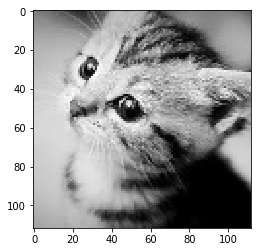

In [22]:
plt.imshow(small_im, cmap='gray')

In [25]:
#Using F.maxpool2d

print('Before maxpool image shape: {} x {}'.format(im.shape[2],im.shape[3]))

small_im = F.max_pool2d(Variable(im),2,2)
small_im = small_im.data.squeeze().numpy()

print('After Maxpool Image shape: {} x {}'.format(small_im.shape[0], small_im.shape[1]))


Before maxpool image shape: 224 x 224
After Maxpool Image shape: 112 x 112


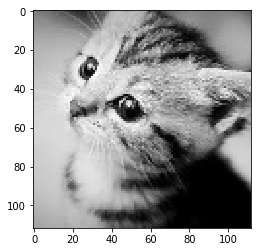

In [26]:
plt.imshow(small_im, cmap='gray')

<b>Like convolution, in general, we generally use ```nn.MaxPool2d()```</b>

Above we have introduced how to use the convolution module and the pooling module in the convolution network. Then we will start to talk about several very well-known network structures in the convolutional network.